# Стоимость жилья в Вашингтоне

В округе Кинг, в штате Вашингтон в 2014-2015 годах было продано огромное количество домов/участков по абсолютно разным ценам. 

Каждый дом обладает рядом качеств по локации, качеству постройки, условиям проживания и так далее. Одни - ближе к береговой линии, другие - ближе центру; какая-то часть расположена в больших микрорайонах, а какие-то в маленьких и пр.

**Цель исследования** 

1. Проверить, какие факторы влияли на цену дома в округе Кинг штата Вашингтон в 2014-2015 годах;
2. Построить модель для предсказания стоимости дома в округе Кинг штата Вашингтон в 2014-2015 годах.

**Ход исследования**

Данные были получены из датасета `kc_house_data.csv`, выгруженного из веб-сайта [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction). О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.  

Данные будут проверены на ошибки.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных (при необходимости)
 3. Выполнение целей исследования

## Обзор данных

In [103]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as skl
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy as sc
import scipy.stats as stats
import pylab 
import numpy as np
from math import e,exp, log

In [104]:
df = pd.read_csv('kc_house_data.csv')

In [105]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [106]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

В таблице 21 столбец. 20 из них содержат числовые данные, один столбец - значения типа 'object'.

Краткое описание всех столбцов данного датасета:
    
* `id` — уникальный идентификатор для каждого проданного дома;
* `date` — дата продажи дома;
* `price`— цена каждого проданного дома;
* `bedrooms` — количество спален;
* `bathrooms` — количество ванных комнат, где .5 приходится на комнату с туалетом, но без душа;
* `sqft_living` — квадратные метры внутренней жилой площади квартир;
* `sqft_lot` — метраж земельного участка;
* `floors` — количество этажей;
* `waterfront` — переменная, указывающая, выходила ли квартира на набережную или нет вид - Индекс от 0 до 4 того, насколько хорошим был вид на недвижимость;
* `view` — индекс от 0 до 4 того, насколько хорошим был вид на недвижимость;
* `condition` — индекс от 1 до 5; 
* `grade` — оценка - индекс от 1 до 13, где 1-3 не соответствует уровню строительства и дизайна зданий, 7 имеет средний уровень строительства и дизайна, а 11-13 имеют высокий уровень качества строительства и дизайна;
* `sqft_above` — площадь внутреннего жилого помещения, находящегося над уровнем земли;
* `sqft_basement` — площадь внутреннего жилого помещения, находящегося ниже уровня земли;
* `yr_built` — год первоначальной постройки;
* `yr_renovated` — год последней реконструкции дома;
* `zipcode` — почтовый индекс дома;
* `lat` — широта;
* `long` — долгота;
* `sqft_living15` — метраж внутренней жилой площади жилья для ближайших 15 соседей;
* `sqft_lot15` — площадь земельных участков ближайших 15 соседей.

Во всех столбцах одинаковое число значений. Значит пропущенных значений нет.

In [108]:
# Проверка на наличие дубликатов
df.duplicated().sum()

0

Дубликатов в данных также не встречается 

## Построение регрессионной модели

In [109]:
columns = list(df.columns)[2:]
columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

Перед построением модели, проверим зависимую переменную на нормалность распределения с помощью теста Шапиро-Уилка.

In [126]:
stat, p = sc.stats.shapiro(df['price']) # тест Шапиро-Уилк
print(column, 'Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

sqft_lot15 Statistics=0.712, p-value=0.000
Отклонить гипотезу о нормальности


C:\Users\nurla\OneDrive\anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Тест показывает, что распределение не является нормальным. Определим размах стоиомости домов в нашем датасете с помощью среднего арифметического и медианного значений.

In [111]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mean_price, median_price

(540088.1417665294, 450000.0)

Разница между медианным и средним значениями незначительно (оценочное суждение). Построим график qq-плот для визауальной оценки нормальности распределения. 

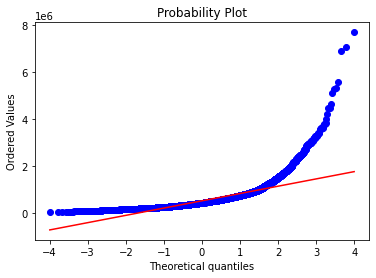

In [87]:
stats.probplot(df['price'], dist="norm", plot=pylab)
pylab.show()

Становится, очевидно, что данные по стоимости домов распределены ненормально. Соответственно, перед построением модели необходимо произвести преобразования.

Попробуем прологарифмировать стоиомости домов в нашем датасете, добавив новый столбец `log_price`. И построим новый график qq-плот для этого столбца.

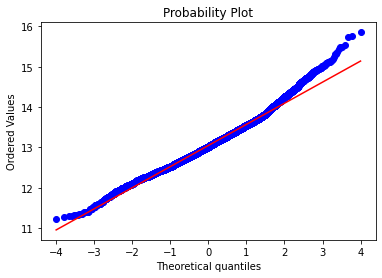

In [112]:
df['log_price'] = np.log(df['price'])
stats.probplot(df['log_price'], dist="norm", plot=pylab)
pylab.show()

Переменную `log_price` можно включать в модель. Теперь проверим переменные на наличие связи между собой, тем самым устранив возможную проблему мультиколлинеарности.

In [113]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.003819
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.891654
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.343561
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.550802
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.695341
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.099622
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.310558
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.174586
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.346522
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.039558


Чем темнее клетка, тем выше корреляция между переменными. Отберем переменые, между которыми абсолютое значение связи составляет ниже 0.5. 

In [116]:
df_filtered = df.loc[:,['log_price','bedrooms','sqft_lot','floors','waterfront','view','condition','grade','yr_built']]

Создадим новые переменные, в которые вложим значения зависимой переменной (y) и независимых переменных(x). Далее найдем такой набор фич, при котором коэффициент детерминации будет наиболее значимым.

In [117]:
y = df_filtered.loc[:,'log_price']
x = df_filtered.loc[:,'bedrooms':'yr_built']

In [118]:
# Найдём такой набор фичей, что R-squared максимальна
feats = {'bedrooms','sqft_lot','floors','waterfront','view','condition','grade','yr_built'}

# Рекурсивно переберём все сочетания переменных
def house_price(params: set, formula: str, result: set) -> str:
    if not params:
        result.add(formula.lstrip('+ '))
        return 
    else:
        new_params = params.copy()
        for el in params:
            new_params.remove(el)

            house_price(new_params, formula + ' + ' + el, result)
            house_price(new_params, formula, result)

res = set()          
house_price(feats, '', res)
res.remove('')

# Теперь посчитаем Adjusted R-Square для каждого сочетания и выведем на экран
results = {}

# Теперь посчитаем Adjusted R-Square для каждого сочетания
for formula in res:
    lm = smf.ols(formula='log_price ~ ' + formula, data=df).fit()
    results[formula] = f'{lm.rsquared_adj:.2}'
    
# выведем отсортированные результаты на экран
d = sorted(results.items(), key=lambda x: x[1], reverse=True)
for i in d:
    print(i[1],'\t',i[0])

0.6 	 bedrooms + yr_built + floors + grade + view
0.6 	 condition + bedrooms + yr_built + floors + view + grade
0.6 	 condition + bedrooms + yr_built + floors + sqft_lot + waterfront + view + grade
0.6 	 bedrooms + yr_built + floors + waterfront + view + grade
0.6 	 condition + bedrooms + yr_built + floors + grade + waterfront + view
0.6 	 condition + waterfront + yr_built + floors + view + sqft_lot + grade
0.6 	 bedrooms + yr_built + floors + grade + waterfront + view
0.6 	 condition + bedrooms + yr_built + floors + sqft_lot + view + grade
0.6 	 bedrooms + yr_built + floors + view + grade
0.6 	 condition + bedrooms + yr_built + sqft_lot + waterfront + view + grade
0.6 	 condition + yr_built + floors + sqft_lot + waterfront + view + grade
0.6 	 bedrooms + waterfront + yr_built + floors + view + sqft_lot + grade
0.6 	 bedrooms + yr_built + floors + view + sqft_lot + grade
0.6 	 bedrooms + yr_built + floors + sqft_lot + view + grade
0.6 	 bedrooms + yr_built + floors + sqft_lot + waterfr

Наиболее высокое значение R^2 получилось при следующем наборе фич:

* `bedrooms`
* `floors` 
* `view`
* `grade`
* `yr_built`



In [119]:
form = 'bedrooms + yr_built + view + floors + grade'.split(' + ')
x = df_filtered.loc[:,form]

Теперь построим регрессионную модель на основе отобранных фич.

In [120]:
import statsmodels.api as sm
x = sm.add_constant(x)

reg_1 = sm.OLS(y, x).fit()

reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     6411.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:32:48   Log-Likelihood:                -6979.3
No. Observations:               21613   AIC:                         1.397e+04
Df Residuals:                   21607   BIC:                         1.402e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.8398      0.178    117.307      0.000      20.492      21.188
bedrooms       0.0590      0.003     22.540      0.000       0.054       0.064
yr_built      -0.0054    9.4e-05    -57.365      0.000      -0.006      -0.005
view           0.0954      0.003     30.528      0.000       0.089       0.102
floors         0.1042      0.005     20.524      0.000       0.094       0.114
grade          0.3213      0.002    128.648      0.000       0.316       0.326
==============================================================================
Omnibus:                       68.222   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.376
Skew:                          -0.040   Prob(JB):                     1.06e-19
Kurtosis:                       3.301   Cond. No.                     1.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
print('Давайте узнаем стоимость вашего дома в King County, Вашингтон! Нужно будет ответить на 5 вопросов.')
print()
print('Определимся с количеством комнат.')
bedrooms = int(input('Сколько комнат вы хотите? '))
print()
print('Определимся с годом постройки дома.')
yr_built = int(input('Введите ориентировочный год постройки дома '))
print()
print('Продолжим оценивать ваш будущий дом. Важен ли вам вид из окна? 0 - вообще не играет роли. 4 - вид из окна очень важен') 
view = int(input('Цифру от 0 до 4: '))
print()
print('Сколько этажей вы хотели бы в своем доме? В наличии 1, 2-х и 3-х этажные дома.')
floors = int(input())
print()
print('И последний вопрос. Оцените ваши ожидания от дизайна и архитектуры вашего будущего дома от 1 до 13, где 1 - довольно скудный дизайн и архитектура, а 13 - не дом, а произведение искусства.')
grade = int(input())

log_price_tag = 20.8398 + 0.0590*bedrooms - 0.0054*yr_built + 0.0954*view + 0.1042*floors + 0.3213*grade
print()
print('Просчитываем стоимость вашего дома... Итак, ориентировочная цена составляет', round(exp(log_price_tag),2), 'долларов')

Давайте узнаем стоимость вашего дома в King County, Вашингтон! Нужно будет ответить на 5 вопросов.

Определимся с количеством комнат.
Сколько комнат вы хотите? 3

Определимся с годом постройки дома.
Введите ориентировочный год постройки дома 1960

Продолжим оценивать ваш будущий дом. Важен ли вам вид из окна? 0 - вообще не играет роли. 4 - вид из окна очень важен
Цифру от 0 до 4: 3

Сколько этажей вы хотели бы в своем доме? В наличии 1, 2-х и 3-х этажные дома.
2

И последний вопрос. Оцените ваши ожидания от дизайна и архитектуры вашего будущего дома от 1 до 13, где 1 - довольно скудный дизайн и архитектура, а 13 - не дом, а произведение искусства.
8

Просчитываем стоимость вашего дома... Итак, ориентировочная цена составляет  727813.42 долларов
